In [3]:
#What should be installed
!pip install owlready2
!pip install wikipedia-api
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_ru')
from gensim.models import Word2Vec
import ontology
import graphics
import model
import nlp
import wikireader
import itertools
from gensim.models.keyedvectors import KeyedVectors


In [4]:

with open('richter.txt', 'r', encoding='utf-8') as f:
    text_to_parse = f.read()



In [5]:
sentences = nlp.parse_text_to_words(text_to_parse)

print(f'Количество предложений: {str(len(sentences))}')
words_amount = sum([len(sent) for sent in sentences])
print(f'Количество слов: {str(words_amount)}')



Количество предложений: 11862
Количество слов: 298132


In [6]:

sentences_array = nlp.normalization(sentences)

print(f'Количество предложений: {str(len(sentences_array))}')
words_amount = sum([len(sent) for sent in sentences_array])
print(f'Количество слов: {str(words_amount)}')
for sent in sentences_array:
    print(sent)


nemanymode', 'exclusive', 'shared', 'public', 'sealed', 'class', 'asynconemanylock', 'region', 'lock', 'code', 'private', 'spinlock', 'm_lock', 'new', 'spinlock', 'true', '//', 'используем', '//', 'readonly', 'spinlock', 'private', 'void', 'lock', 'boolean', 'taken', 'false', 'm_lock.enter', 'ref', 'taken', 'private', 'void', 'unlock', 'm_lock.exit', 'endregion', 'region', 'lock', 'state', 'and', 'helper', 'methods', 'продолжение', '\uf0c8', '886', 'глава.30', '.гибридные.конструкции.синхронизации.потоков', 'private', 'int32', 'm_state', '0', 'private', 'boolean', 'isfree', 'get', 'return', 'm_state', '==', '0', 'private', 'boolean', 'isownedbywriter', 'get', 'return', 'm_state', '==', '1', 'private', 'boolean', 'isownedbyreaders', 'get', 'return', 'm_state', '0', 'private', 'int32', 'addreaders', 'int32', 'count', 'return', 'm_state', '+=', 'count', 'private', 'int32', 'subtractreader', 'return', 'm_state', 'private', 'void', 'makewriter', 'm_state', '1', 'private', 'void', 'makefree'

In [7]:

sentences = nlp.add_bigrams(sentences_array, 20, 15.0)
for sent in sentences:
    # Вывод биграмм
    for word in sent:
        for symbol in word:
            if symbol == '_':
                print(word)

nlp.show_most_frequent_words(sentences, amount=20)


ic_override
string.format_``
private_static
s_log
public_static
s_log.values
public_static
task_tresult
task_tresult
task_tresult
public_static
s_log
s_log.tryremove
public_static
async_task
foreach_var
конечный_автомат
public_sealed
m_events
m_continuation
конечный_автомат
вызывает_метод
продолжение_
глава.28_.асинхронные.операции.ввода-вывода
public_boolean
get_return
m_events.count
конечный_автомат
public_void
m_continuation
конечный_автомат
m_events.trydequeue
public_void
m_events.enqueue
m_continuation
конечного_автомата
данном_случае
конечный_автомат
private_static
console.writeline_``
public_static
for_int32
throw_new
throw_new
throw_new
конечного_автомата
операции_ввода-вывода
компилятор_c
оператор_await
компилятор_генерирует
конечного_автомата
объект_task
конечный_автомат
ключевым_словом
сообщение_ошибке
объект_task
компилятор_c
глава.28_.асинхронные.операции.ввода-вывода
операции_ввода-вывода
.net_framework
.net_framework
методы_расширения
winrt_api
private_static
c_pipename

In [8]:

w2v_model = model.train_word2vec(sentences,
                                 min_count=2,
                                 window=7,
                                 size=250,
                                 sample=0.001,
                                 epochs=500,
                                 sg=0,
                                 hs=0,
                                 negative=20)

print('Размер словаря: ', len(w2v_model.wv.vocab))


Loss after epoch 0: 354484.6875
Loss after epoch 10: 159962.5
Loss after epoch 20: 98821.25
Loss after epoch 30: 88614.5
Loss after epoch 40: 72561.0
Loss after epoch 50: 70909.0
Loss after epoch 60: 58178.0
Loss after epoch 70: 55436.0
Loss after epoch 80: 60277.0
Loss after epoch 90: 50172.0
Loss after epoch 100: 50805.0
Loss after epoch 110: 56151.0
Loss after epoch 120: 54827.0
Loss after epoch 130: 49545.0
Loss after epoch 140: 48984.0
Loss after epoch 150: 55228.0
Loss after epoch 160: 56061.0
Loss after epoch 170: 49579.0
Loss after epoch 180: 55110.0
Loss after epoch 190: 54915.0
Loss after epoch 200: 55078.0
Loss after epoch 210: 53589.0
Loss after epoch 220: 53700.0
Loss after epoch 230: 53472.0
Loss after epoch 240: 45527.0
Loss after epoch 250: 32478.0
Loss after epoch 260: 36868.0
Loss after epoch 270: 36334.0
Loss after epoch 280: 35318.0
Loss after epoch 290: 34456.0
Loss after epoch 300: 30476.0
Loss after epoch 310: 28912.0
Loss after epoch 320: 31846.0
Loss after epoc

In [9]:

tagged_words = nlp.pos_tagging(sentences)
word_vectors = w2v_model.wv
word_vectors.save('vectors/richter_1.kv')



In [10]:

#print(dict(itertools.islice(tagged_words.items(), 5)))
ontology.populate_ontology(word_vectors,
                           tagged_words,
                           input_onto=r'ooponto.owl',
                           output_onto=r'test.owl',
                           topn=30)



ВстроенныйТипДанных
рабочий: 0.2845 A=m

ТипДанных

ДинамическийТипДанных
выгрузке: 0.3059 S
целый: 0.2968 A=m
схеме: 0.2922 S
поисках: 0.2836 S
фазы: 0.2656 S
необработанным: 0.2585 A=m
остановке: 0.2568 S
завершению: 0.2493 S
контекст: 0.2492 S
стеком: 0.2439 S
переходом: 0.2429 S
такта: 0.2389 S
пользовательском: 0.2387 S
win32-функция: 0.2328 S
рабочего: 0.2315 S
последовательность: 0.2298 S
выгрузка: 0.2264 S
конструкцией: 0.2246 S
остановка: 0.2231 S
подобного: 0.2219 A=m
отдельным: 0.2172 A=m

ЗначимыйТипДанных
рабочий: 0.2845 A=m

КлючевоеСлово
class_sometype: 0.4460 NONLEX
uint: 0.4227 NONLEX
class_program: 0.3920 NONLEX
winrtenum: 0.3593 NONLEX
cancellationtokenregistration: 0.3483 NONLEX
uint32: 0.3464 NONLEX
asynconemanylock: 0.3197 NONLEX
onemanymode: 0.3147 NONLEX
system.int32: 0.2984 NONLEX
short: 0.2944 NONLEX
bool: 0.2894 NONLEX
intptr: 0.2871 NONLEX
none: 0.2868 NONLEX
node: 0.2856 NONLEX
taskloglevel: 0.2843 NONLEX
readonly: 0.2806 NONLEX
osversioninfosize: 0.2767 NO

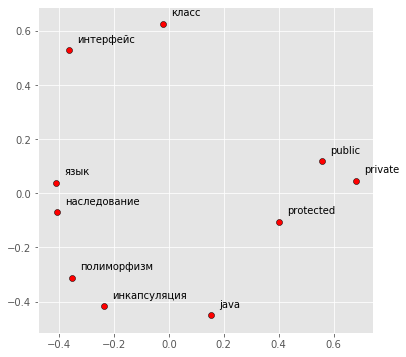

In [11]:
graphics.display_pca_scatterplot(word_vectors,
                                 ['класс', 'интерфейс', 'инкапсуляция', 'наследование',
                                  'java', 'private', 'protected', 'public',
                                  'язык', 'полиморфизм'])

# graphics.display_pca_scatterplot(word_vectors, sample=20)
